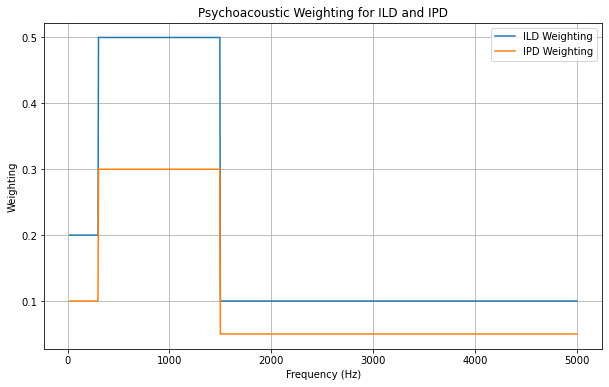

In [25]:
import torch

def psychoacoustic_weighting(frequencies):
    """
    Generate psychoacoustic weightings for ILD and IPD based on frequency.
    
    Args:
        frequencies (torch.Tensor): A 1D tensor of frequencies in Hz.
        
    Returns:
        ild_weights (torch.Tensor): Weightings for ILD.
        ipd_weights (torch.Tensor): Weightings for IPD.
    """
    ild_weights = torch.zeros_like(frequencies)
    ipd_weights = torch.zeros_like(frequencies)

    # Define frequency ranges
    low_freq_range = (frequencies >= 20) & (frequencies < 300)
    mid_freq_range = (frequencies >= 300) & (frequencies < 1500)
    high_freq_range = frequencies >= 1500

    # Apply weighting factors
    ild_weights[low_freq_range] = 0.2  # Adjust as needed
    ild_weights[mid_freq_range] = 0.5  # Adjust as needed
    ild_weights[high_freq_range] = 0.1  # Adjust as needed

    ipd_weights[low_freq_range] = 0.1  # Adjust as needed
    ipd_weights[mid_freq_range] = 0.3  # Adjust as needed
    ipd_weights[high_freq_range] = 0.05  # Adjust as needed

    return ild_weights, ipd_weights

# Example usage
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    # Define frequency range (adjust as needed)
    frequencies = torch.linspace(20, 5000, 1000)

    # Generate weightings
    ild_weights, ipd_weights = psychoacoustic_weighting(frequencies)

    # Plot the weightings
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, ild_weights, label='ILD Weighting')
    plt.plot(frequencies, ipd_weights, label='IPD Weighting')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Weighting')
    plt.title('Psychoacoustic Weighting for ILD and IPD')
    plt.legend()
    plt.grid(True)
    plt.show()


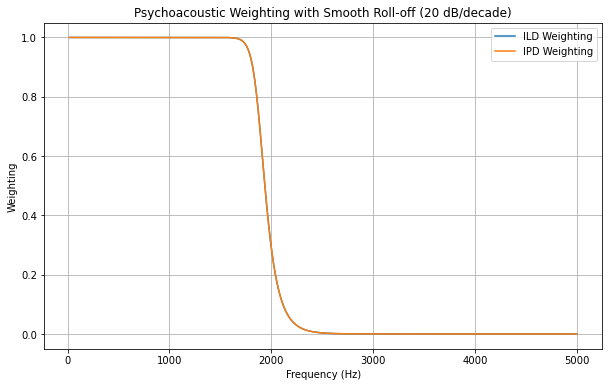

In [26]:
import torch
import matplotlib.pyplot as plt

def first_order_low_pass(frequencies, cutoff_frequency, rolloff_rate):
    """
    Apply a first-order low-pass filter to the given frequencies.

    Args:
        frequencies (torch.Tensor): A 1D tensor of frequencies in Hz.
        cutoff_frequency (float): The cutoff frequency of the filter in Hz.
        rolloff_rate (float): The rolloff rate in dB per decade.

    Returns:
        weights (torch.Tensor): Weightings based on the filter.
    """
    omega_c = 2 * torch.pi * cutoff_frequency
    weights = 1 / torch.sqrt(1 + (frequencies / omega_c)**(2 * rolloff_rate))

    return weights

def psychoacoustic_weighting(frequencies):
    """
    Generate psychoacoustic weightings for ILD and IPD based on frequency.

    Args:
        frequencies (torch.Tensor): A 1D tensor of frequencies in Hz.

    Returns:
        ild_weights (torch.Tensor): Weightings for ILD.
        ipd_weights (torch.Tensor): Weightings for IPD.
    """
    ild_weights = first_order_low_pass(frequencies, cutoff_frequency=300, rolloff_rate=20)
    ipd_weights = first_order_low_pass(frequencies, cutoff_frequency=300, rolloff_rate=20)

    return ild_weights, ipd_weights

# Example usage
if __name__ == "__main__":
    # Define frequency range (adjust as needed)
    frequencies = torch.linspace(20, 5000, 1000)

    # Generate weightings
    ild_weights, ipd_weights = psychoacoustic_weighting(frequencies)

    # Plot the weightings
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, ild_weights, label='ILD Weighting')
    plt.plot(frequencies, ipd_weights, label='IPD Weighting')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Weighting')
    plt.title('Psychoacoustic Weighting with Smooth Roll-off (20 dB/decade)')
    plt.legend()
    plt.grid(True)
    plt.show()


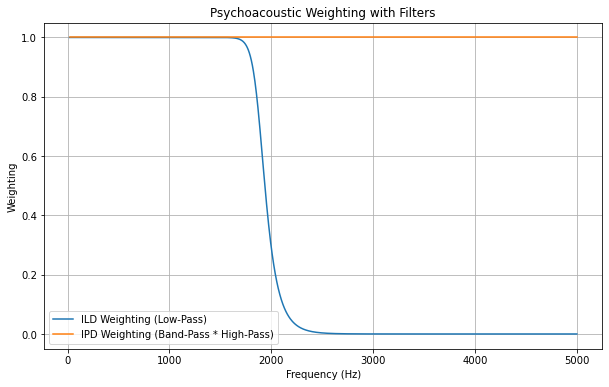

In [27]:
import torch
import matplotlib.pyplot as plt

def low_pass_filter(frequencies, cutoff_frequency, rolloff_rate):
    """
    Apply a low-pass filter to the given frequencies.

    Args:
        frequencies (torch.Tensor): A 1D tensor of frequencies in Hz.
        cutoff_frequency (float): The cutoff frequency of the filter in Hz.
        rolloff_rate (float): The rolloff rate in dB per decade.

    Returns:
        weights (torch.Tensor): Filter weights.
    """
    omega_c = 2 * torch.pi * cutoff_frequency
    weights = 1 / torch.sqrt(1 + (frequencies / omega_c)**(2 * rolloff_rate))
    return weights

def band_pass_filter(frequencies, center_frequency, bandwidth):
    """
    Apply a band-pass filter to the given frequencies.

    Args:
        frequencies (torch.Tensor): A 1D tensor of frequencies in Hz.
        center_frequency (float): The center frequency of the filter in Hz.
        bandwidth (float): The bandwidth of the filter in Hz.

    Returns:
        weights (torch.Tensor): Filter weights.
    """
    weights = torch.exp(-0.5 * ((frequencies - center_frequency) / bandwidth)**2)
    return weights

def high_pass_filter(frequencies, cutoff_frequency, rolloff_rate):
    """
    Apply a high-pass filter to the given frequencies.

    Args:
        frequencies (torch.Tensor): A 1D tensor of frequencies in Hz.
        cutoff_frequency (float): The cutoff frequency of the filter in Hz.
        rolloff_rate (float): The rolloff rate in dB per decade.

    Returns:
        weights (torch.Tensor): Filter weights.
    """
    omega_c = 2 * torch.pi * cutoff_frequency
    weights = 1 / (1 + (frequencies / omega_c)**(2 * rolloff_rate))
    return weights

def psychoacoustic_weighting(frequencies):
    """
    Generate psychoacoustic weightings for ILD and IPD based on frequency.

    Args:
        frequencies (torch.Tensor): A 1D tensor of frequencies in Hz.

    Returns:
        ild_weights (torch.Tensor): Weightings for ILD.
        ipd_weights (torch.Tensor): Weightings for IPD.
    """
    # Define filter parameters
    lowpass_cutoff = 300
    lowpass_rolloff_rate = 20
    bandpass_center = 1000
    bandpass_bandwidth = 500
    highpass_cutoff = 1500
    highpass_rolloff_rate = 20

    # Apply filters
    lowpass = low_pass_filter(frequencies, lowpass_cutoff, lowpass_rolloff_rate)
    bandpass = band_pass_filter(frequencies, bandpass_center, bandpass_bandwidth)
    highpass = high_pass_filter(frequencies, highpass_cutoff, highpass_rolloff_rate)

    # Calculate ILD and IPD weights
    ild_weights = lowpass  # Adjust as needed
    ipd_weights = highpass  # Adjust as needed

    return ild_weights, ipd_weights

# Example usage
if __name__ == "__main__":
    # Define frequency range (adjust as needed)
    frequencies = torch.linspace(20, 5000, 1000)

    # Generate weightings
    ild_weights, ipd_weights = psychoacoustic_weighting(frequencies)

    # Plot the weightings
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, ild_weights, label='ILD Weighting (Low-Pass)')
    plt.plot(frequencies, ipd_weights, label='IPD Weighting (Band-Pass * High-Pass)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Weighting')
    plt.title('Psychoacoustic Weighting with Filters')
    plt.legend()
    plt.grid(True)
    plt.show()


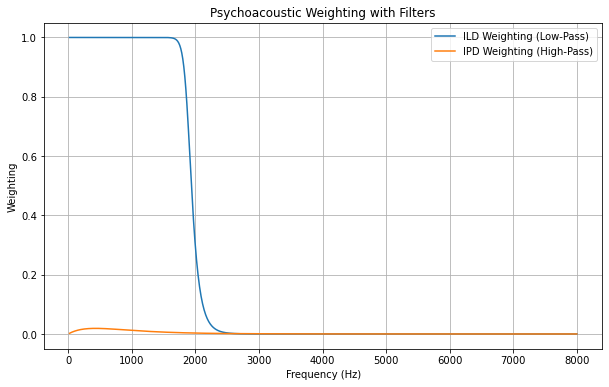

In [30]:
import torch
import matplotlib.pyplot as plt

def low_pass_filter(frequencies, cutoff_frequency, rolloff_rate):
    """
    Apply a low-pass filter to the given frequencies.

    Args:
        frequencies (torch.Tensor): A 1D tensor of frequencies in Hz.
        cutoff_frequency (float): The cutoff frequency of the filter in Hz.
        rolloff_rate (float): The rolloff rate in dB per decade.

    Returns:
        weights (torch.Tensor): Filter weights.
    """
    omega_c = 2 * torch.pi * cutoff_frequency
    weights = 1 / torch.sqrt(1 + (frequencies / omega_c)**(2 * rolloff_rate))
    return weights

def high_pass_filter(frequencies, cutoff_frequency, rolloff_rate):
    """
    Apply a high-pass filter to the given frequencies.

    Args:
        frequencies (torch.Tensor): A 1D tensor of frequencies in Hz.
        cutoff_frequency (float): The cutoff frequency of the filter in Hz.
        rolloff_rate (float): The rolloff rate in dB per decade.

    Returns:
        weights (torch.Tensor): Filter weights.
    """
    omega_c = 2 * torch.pi * cutoff_frequency
    weights = (frequencies/omega_c) / (torch.sqrt(1 + (frequencies / omega_c)))**(2 * rolloff_rate)
    return weights

def psychoacoustic_weighting(frequencies):
    """
    Generate psychoacoustic weightings for ILD and IPD based on frequency.

    Args:
        frequencies (torch.Tensor): A 1D tensor of frequencies in Hz.

    Returns:
        ild_weights (torch.Tensor): Weightings for ILD.
        ipd_weights (torch.Tensor): Weightings for IPD.
    """
    # Define filter parameters
    lowpass_cutoff = 300
    lowpass_rolloff_rate = 20
    highpass_cutoff = 1300

    highpass_rolloff_rate = 20

    # Apply filters
    lowpass = low_pass_filter(frequencies, lowpass_cutoff, lowpass_rolloff_rate)
    highpass = high_pass_filter(frequencies, highpass_cutoff, highpass_rolloff_rate)

    # Calculate ILD and IPD weights
    ild_weights = lowpass  # Adjust as needed
    ipd_weights = highpass  # Adjust as needed

    return ild_weights, ipd_weights

# Example usage
if __name__ == "__main__":
    # Define frequency range (adjust as needed)
    frequencies = torch.linspace(20, 8000, 1000)

    # Generate weightings
    ild_weights, ipd_weights = psychoacoustic_weighting(frequencies)

    # Plot the weightings
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, ild_weights, label='ILD Weighting (Low-Pass)')
    plt.plot(frequencies, ipd_weights, label='IPD Weighting (High-Pass)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Weighting')
    plt.title('Psychoacoustic Weighting with Filters')
    plt.legend()
    plt.grid(True)
    plt.show()


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/torch/functional.py:632: UserWarning: stft will soon require the return_complex parameter be given for real inputs, and will further require that return_complex=True in a future PyTorch release. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/SpectralOps.cpp:804.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore[attr-defined]


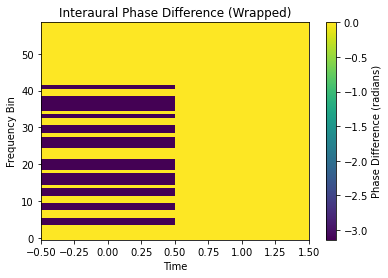

In [2]:
import torch
import torchaudio
import numpy as np

# Load binaural audio signals (left and right channels)
audio, sample_rate = torchaudio.load("/Users/vtokala/Documents/Research/di_nn/Dataset/clean_testset_1f/p278_044_1.wav")

left_audio = audio[0,:]
right_audio =audio[1,:]
# Apply Short-Time Fourier Transform (STFT)
n_fft = 2048
hop_length = 512
left_spec = torch.stft(left_audio, n_fft=n_fft, hop_length=hop_length, center=False)
right_spec = torch.stft(right_audio, n_fft=n_fft, hop_length=hop_length, center=False)

# Calculate the phase difference
phase_diff = torch.angle(left_spec) - torch.angle(right_spec)

# Account for phase wrapping
def wrap_to_pi(phase_diff):
    return torch.remainder(phase_diff + torch.pi, 2 * torch.pi) - torch.pi

IPD_wrapped = wrap_to_pi(phase_diff)

# IPD visualization (example)
import matplotlib.pyplot as plt

plt.imshow(IPD_wrapped[0].numpy(), aspect='auto', origin='lower', cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Frequency Bin')
plt.title('Interaural Phase Difference (Wrapped)')
plt.colorbar(label='Phase Difference (radians)')
plt.show()


In [3]:
IPD_wrapped

tensor([[[ 0.0000,  0.0000],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000]],

        [[ 0.0000,  0.0000],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000]],

        [[ 0.0000,  0.0000],
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000],
         ...,
         [ 0.0000,  0.0000],
         [ 0.0000,  0.0000],
         [-3.1416,  0.0000]],

        ...,

        [[ 0.0000, -3.1416],
         [ 0.0000, -3.1416],
         [ 0.0000,  0.0000],
         ...,
         [ 0.0000, -3.1416],
         [ 0.0000, -3.1416],
         [ 0.0000, -3.1416]],

        [[ 0.0000, -3.1416],
         [ 0.0000,  0.0000],
         [-3.1416,  0.0000],
         ...,
         [ 0.0000, -3.1416],
         [ 0.0000,  0.0000],
         [ 0.0000, -3.1416]],

        [[ 0.0000,  0.0000],
       